# Business understanding

# The questions I am trying to answer:

- what was the top 4 movies based on rating?
- what was the top 4 movies based on revenue?
- what was the movie with the biggest budget?

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:

df =pd.read_csv("tmdb-movies.csv")

# Data Understanding:

In [12]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [14]:
df.shape

(10866, 21)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [16]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [21]:
#cleaing the data by deleting not needed coulms which are in my case are overview and home paga and every colums not related to price and popluarity
df-df.select_dtypes(exclude="object")

,budget,budget_adj,cast,director,genres,homepage,id,imdb_id,keywords,original_title,...,popularity,production_companies,release_date,release_year,revenue,revenue_adj,runtime,tagline,vote_average,vote_count
0,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0.0,0,NaN,0.0,0
1,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0.0,0,NaN,0.0,0
2,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0.0,0,NaN,0.0,0
3,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0.0,0,NaN,0.0,0
4,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0.0,0,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0.0,0,NaN,0.0,0
10862,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0.0,0,NaN,0.0,0
10863,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0.0,0,NaN,0.0,0
10864,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0.0,0,NaN,0.0,0


In [19]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [30]:
#i was trying to understand and take an overview of my data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count         

# Prepare Data

In [38]:
#i dropped some unwanted columns 
df.drop(["imdb_id","homepage","tagline","overview","keywords"], axis=1)

KeyError: "['imdb_id' 'homepage' 'tagline' 'overview' 'keywords'] not found in axis"

In [36]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [42]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [44]:
#here i try to change data type
df['release_year']=pd.to_datetime(df['release_year'])

In [49]:
#i tried here to take an overview incase there was some unneeded values, and there was so i dropped them
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [51]:
df.drop('production_companies',axis=1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,6/15/66,11,7.4,1970-01-01 00:00:00.000001966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1970-01-01 00:00:00.000001966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1970-01-01 00:00:00.000001966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1970-01-01 00:00:00.000001966,0.000000e+00,0.000000e+00


In [52]:
df.dropna(inplace=True)

In [53]:
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [54]:
#I tried to check any duplicated rows as part of data cleaning 
df.duplicated().sum()

1

In [59]:
#dropping the duplicated row
df.drop_duplicates(inplace=True)

In [60]:
df.duplicated().sum()

0

In [61]:
#I noticed that categories are hard to use becuse some movies have many categories so i split them 
df["genres"]=df['genres'].str.split('|',1,expand=True)

# Now i will start to answer my above questions.

# 1-  what was the best 4 movies based on rating?

In [63]:
#viewed columns to help me answer 
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [64]:
#the column that would help me would be vote average 
df['vote_average']

0        6.5
1        7.1
2        6.3
3        7.5
4        7.3
        ... 
10861    7.4
10862    5.7
10863    6.5
10864    5.4
10865    1.5
Name: vote_average, Length: 9772, dtype: float64

# Data Modeling:

In [72]:
big4=df.sort_values(by='vote_average',ascending=False)[['original_title','vote_average']]

<AxesSubplot:xlabel='original_title'>

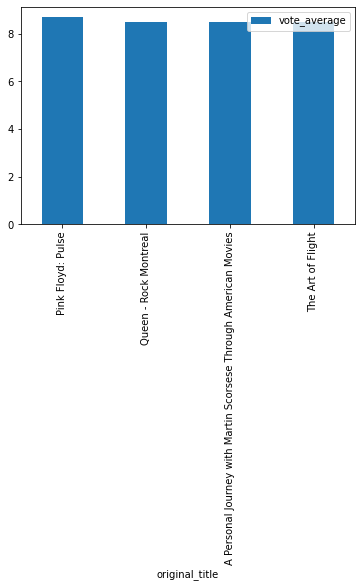

In [77]:
big4.nlargest(columns='vote_average',n=4).plot(kind="bar",x='original_title',y="vote_average")

# Finding= we can see the top 4 movies or how i like to call them big4 based on voting are pink floyed,queen , a personal journal amd the art of flight

# The second question is what is big 4 in terms of revenue

In [79]:
#I revisited the columns so i can cope them easily 
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

<AxesSubplot:xlabel='original_title'>

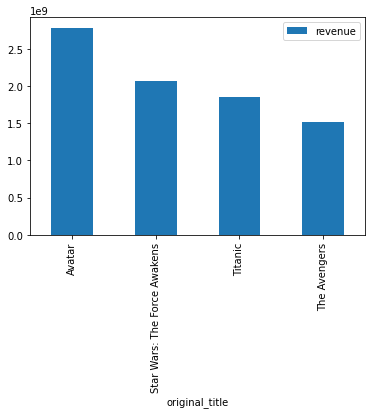

In [80]:
#same as above
big4=df.sort_values(by='revenue',ascending=False)[['original_title','revenue']]
big4.nlargest(columns='revenue',n=4).plot(kind="bar",x='original_title',y="revenue")

# finding: as we can see there is a diffrent between the best in rating and the best in revenue

# The third question is does budget affect revenue? 

<AxesSubplot:xlabel='original_title'>

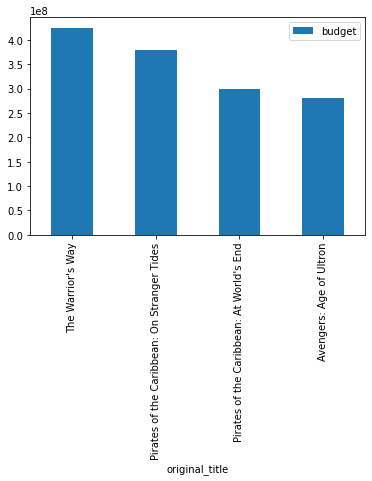

In [81]:
big4=df.sort_values(by='budget',ascending=False)[['original_title','budget']]
big4.nlargest(columns='budget',n=4).plot(kind="bar",x='original_title',y="budget")

# findings: as we can see budget doesn't determe revenue 

In [11]:
def my_big4function():
	"""Demonstrates charts and insights about movies ratings and reveune."""

	return None

print("Using __doc__:")
print(my_big4function.__doc__)

print("Using help:")
help(my_big4function)

Using __doc__:
Demonstrates charts and insights about movies ratings and reveune.
Using help:
Help on function my_big4function in module __main__:

my_big4function()
    Demonstrates charts and insights about movies ratings and reveune.



# conclusion: 
    if you want your movies to earn top ratinings foucs on the art itself not your revenue and don't take low budget as a reason to not earn ratings or revenue

In [82]:
#to export it 
df.to_csv('tmdb-movies_grpu2.csv',index=False)